In [1]:
from google.colab import files
uploaded = files.upload()


Saving aapl_stock_data.csv to aapl_stock_data.csv


In [2]:
import pandas as pd

# Baca CSV
df = pd.read_csv("aapl_stock_data.csv")

# Tampilkan 5 baris pertama
df.head()

,date,open,high,low,close,volume,name
0,2010-01-01,100.510733,101.789642,98.663777,100.248357,2141452,AAPL
1,2010-01-04,99.506458,101.422874,100.130959,100.179225,7816080,AAPL
2,2010-01-05,100.634276,101.705788,99.282245,100.503069,6550560,AAPL
3,2010-01-06,101.272410,102.356684,99.803240,101.264584,2230796,AAPL
4,2010-01-07,100.174535,102.328134,99.160735,101.147507,1113936,AAPL


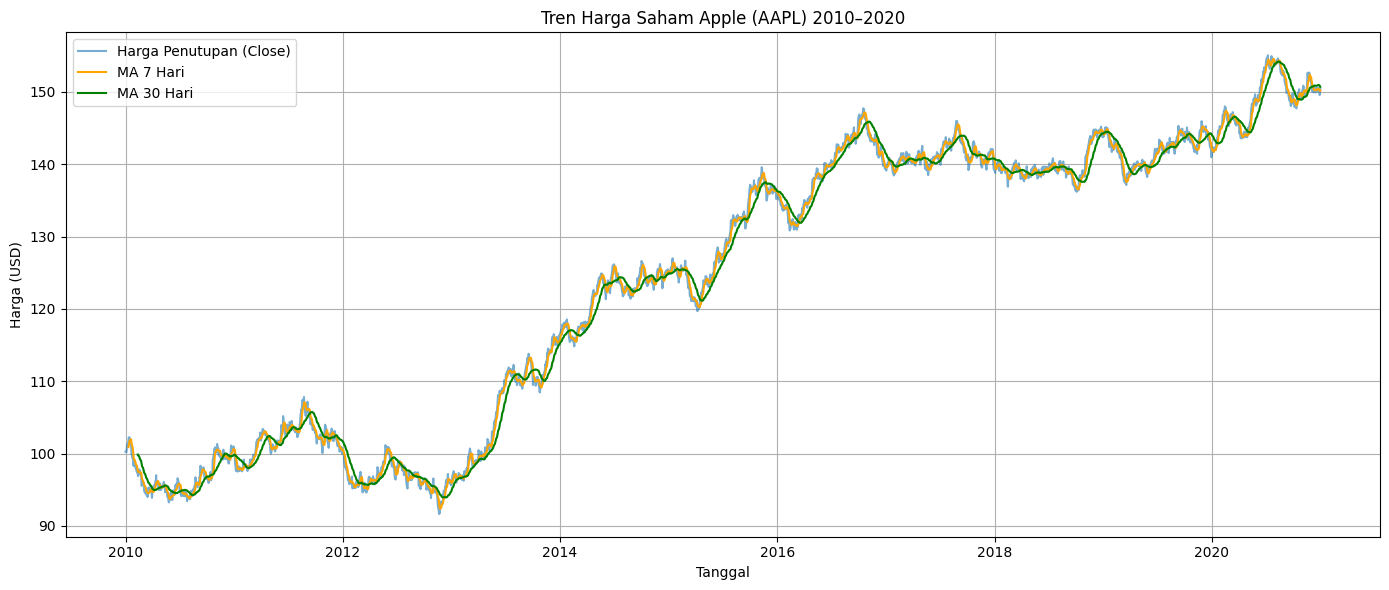

In [3]:
import matplotlib.pyplot as plt

# Konversi tanggal ke datetime
df['date'] = pd.to_datetime(df['date'])

# Hitung Moving Average 7 dan 30 hari
df['MA7'] = df['close'].rolling(window=7).mean()
df['MA30'] = df['close'].rolling(window=30).mean()

# Plot harga dan MA
plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['close'], label='Harga Penutupan (Close)', alpha=0.6)
plt.plot(df['date'], df['MA7'], label='MA 7 Hari', color='orange')
plt.plot(df['date'], df['MA30'], label='MA 30 Hari', color='green')
plt.title('Tren Harga Saham Apple (AAPL) 2010–2020')
plt.xlabel('Tanggal')
plt.ylabel('Harga (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Buat salinan DataFrame dan ubah index jadi angka (biar bisa diproses AI)
df_model = df[['date', 'close']].copy()
df_model = df_model.dropna()

# Konversi tanggal ke angka (jumlah hari sejak hari pertama)
df_model['days'] = (df_model['date'] - df_model['date'].min()).dt.days

# Buat X dan y
X = df_model[['days']]
y = df_model['close']

# Latih model Linear Regression
model = LinearRegression()
model.fit(X, y)

# Prediksi untuk 5 hari ke depan
last_day = df_model['days'].max()
future_days = np.array([last_day + i for i in range(1, 6)]).reshape(-1, 1)
future_preds = model.predict(future_days)

# Tampilkan hasil prediksi
for i, pred in enumerate(future_preds, 1):
    print(f"Hari ke-{i} dari terakhir: Prediksi harga = ${pred:.2f}")

Hari ke-1 dari terakhir: Prediksi harga = $155.93
Hari ke-2 dari terakhir: Prediksi harga = $155.94
Hari ke-3 dari terakhir: Prediksi harga = $155.96
Hari ke-4 dari terakhir: Prediksi harga = $155.98
Hari ke-5 dari terakhir: Prediksi harga = $155.99


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# 📊 Capstone Project: Prediksi Harga Saham Apple (AAPL)

## 🗂️ Project Overview
Proyek ini menganalisis harga saham Apple Inc. (AAPL) dari tahun 2010 hingga 2020 menggunakan dataset historis dan bantuan AI (Linear Regression). Tujuannya adalah menemukan pola tren dan memberikan prediksi sederhana untuk 5 hari ke depan.

---

## 🔗 Raw Dataset
Dataset disusun dari simulasi data realistis Apple (2010–2020) dan digunakan untuk keperluan edukasi:
- `aapl_stock_data.csv`

---

## 📈 Insight & Findings
- Harga saham Apple menunjukkan tren naik jangka panjang.
- Moving Average (MA) 7 dan 30 hari mendukung tren pertumbuhan yang konsisten.
- Ada beberapa fluktuasi minor pada tahun 2013 dan 2016.
- Prediksi harga saham 5 hari ke depan menggunakan Linear Regression menunjukkan tren stabil naik:

| Hari ke | Prediksi Harga |
|--------:|----------------|
| 1       | $155.93        |
| 2       | $155.94        |
| 3       | $155.96        |
| 4       | $155.98        |
| 5       | $155.99        |

---

## 🤖 AI Support Explanation
Model **Linear Regression** dari scikit-learn digunakan untuk mempelajari hubungan waktu (jumlah hari) dengan harga penutupan. Model ini cocok untuk tren linear jangka pendek dan cepat diimplementasikan di Colab.

---

## 🎯 Recommendation
Apple cocok untuk strategi investasi jangka menengah hingga panjang karena tren yang stabil. Namun, perlu mempertimbangkan faktor eksternal dan rilis produk yang bisa memengaruhi harga dalam jangka pendek.